# Q5: Analysis (20 points)
By now you should know how to train networks from scratch or using from pre-trained models. You should also understand the relative performance in either scenarios. Needless to say, the performance of these models is stronger than previous non-deep architectures used until 2012. However, final performance is not the only metric we care about. It is important to get some intuition of what these models are really learning. Lets try some standard techniques.


**FEEL FREE TO WRITE UTIL CODE IN ANOTHER FILE AND IMPORT IN THIS NOTEBOOK FOR EASE OF READABILITY**

## 5.1 Nearest Neighbors (7 pts)
Pick 3 images from PASCAL test set from different classes, and compute 4 nearest neighbors over the entire test set for each of them. You should compare the following feature representations to find the nearest neighbors:
1. The features before the final fc layer from the ResNet (finetuned from ImageNet). It is the features right before the final class label output.
2. pool5 features from the CaffeNet (trained from scratch)

You may use the [this nearest neighbor function](https://scikit-learn.org/stable/modules/neighbors.html).
Plot the raw images of the ones you picked and their nearest neighbors.

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import models
import matplotlib.pyplot as plt
%matplotlib inline

import trainer
import utils
from utils import ARGS
from simple_cnn import SimpleCNN
from voc_dataset import VOCDataset
import PIL

# Load all the test images. Pick 3 indices.
args = ARGS(epochs=10, lr=0.0001, batch_size=32, test_batch_size=128, gamma=0.75, step_size=5, save_at_end=True, save_freq=-1, use_cuda=True)
args.test_batch_size=1
test_loader = utils.get_data_loader(
        'voc', train=False, batch_size=args.test_batch_size, split='test', inp_size=args.inp_size)
# images = next(iter(test_loader))
# indices = [20, 33, 100]

# Calculate the features for all the test images.

# Fine the nearest neighbors for the 3 images you picked.

# Plot the images and their neighbors.

In [2]:
im1 = images[0][indices[0],:].permute(1,2,0)
label1 = (images[1][indices[0]], images[2][indices[0]])
im2 = images[0][indices[1],:].permute(1,2,0)
label2 = (images[1][indices[1]], images[2][indices[1]])
im1 = images[0][indices[2],:].permute(1,2,0)
label1 = (images[1][indices[2]], images[2][indices[2]])

plt.imshow(im1.numpy())
plt.show()

print(images[0].shape)

IndexError: index 20 is out of bounds for dimension 0 with size 1

In [3]:
import numpy as np
resnet = models.resnet18(pretrained=True)
resnet_last_layer = torch.nn.Sequential(*(list(resnet.children())[:-1]))
# print(model_last_layer)
# args = ARGS(epochs=10, lr=0.0001, batch_size=32, test_batch_size=128, gamma=0.75, step_size=5, save_at_end=True, save_freq=-1, use_cuda=True)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
resnet_last_layer = resnet_last_layer.to(device)
resnet_last_layer.eval()
# output_total = np.array([])
output_total = None
with torch.no_grad():
    for batch_idx, (data, target, wgt) in enumerate(test_loader):
        # TODO Q1.3: insert your code here
        # print(batch_idx, data.shape)

        data, target, wgt = data.to(device), target.to(device), wgt.to(device)
        output = resnet_last_layer(data)
        if output_total is None:
            output_total = output.cpu().detach().numpy()
        else:
            output_total = np.concatenate((output_total, output.cpu().detach().numpy()), axis=0)
        # output_total = np.append(output_total, output.cpu().detach().numpy())
        # print(output.shape, output_total.shape)


print(batch_idx)
print(output_total.shape)

4951
(4952, 512, 1, 1)


In [8]:
# print(len(output_total))
output_total = output_total.reshape(len(test_loader.dataset), -1)
print(output_total.shape)
from sklearn.neighbors import NearestNeighbors
neighbor = NearestNeighbors(n_neighbors=5, algorithm='ball_tree')
neighbor.fit(output_total)

im1 = output_total[indices[0],:].reshape(1,-1)
print(im1.shape)

im1_n_dist, im1_n_index = neighbor.kneighbors(im1)
print(im1_n_dist)
print(im1_n_index)


(4952, 512)
(1, 512)
[[ 0.         16.18378644 17.96631186 18.24812128 18.34732863]]
[[  20 2242 2074 1159 4423]]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


100


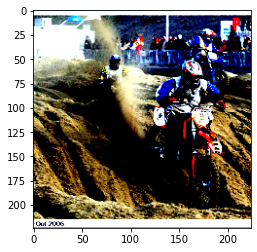

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0.]
<class 'numpy.int64'>
motorbike


In [5]:
print(indices[2])
im1, label1, weught1 = test_loader.dataset.__getitem__(indices[2])
plt.imshow(im1.permute(1,2,0).numpy())
plt.show()
print(label1.numpy())
print(type(label1.numpy().nonzero()[0][0]))
label_name1 = test_loader.dataset.get_class_name(label1.numpy().nonzero()[0][0])
print(label_name1)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
<class 'numpy.int64'>
bird
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
<class 'numpy.int64'>
bird
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
<class 'numpy.int64'>
bird
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
<class 'numpy.int64'>
bird
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
<class 'numpy.int64'>
bird


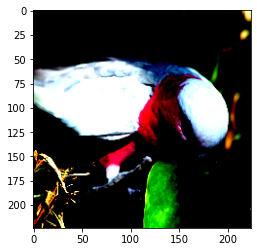

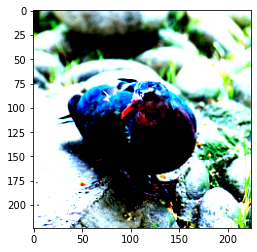

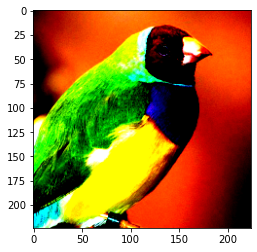

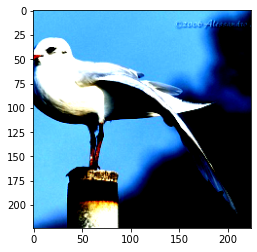

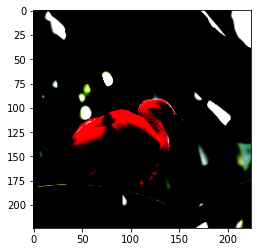

In [10]:
for indices in im1_n_index[0]:
    im1, label1, weught1 = test_loader.dataset.__getitem__(indices)
    plt.figure()
    plt.imshow(im1.permute(1,2,0).numpy())
    # plt.show()
    print(label1.numpy())
    print(type(label1.numpy().nonzero()[0][0]))
    label_name1 = test_loader.dataset.get_class_name(label1.numpy().nonzero()[0][0])
    print(label_name1)

In [11]:
class CaffeNet(nn.Module):
    def __init__(self, num_classes=20, inp_size=224, c_dim=3):
        super().__init__()
        self.num_classes = num_classes
        self.conv1 = nn.Conv2d(in_channels=c_dim, out_channels=96, kernel_size=11, stride=4, padding='valid')
        self.conv2 = nn.Conv2d(in_channels=96, out_channels=256, kernel_size=5, stride=1, padding='same')
        self.conv3 = nn.Conv2d(in_channels=256, out_channels=384, kernel_size=3, stride=1, padding='same')
        self.conv4 = nn.Conv2d(in_channels=384, out_channels=384, kernel_size=3, stride=1, padding='same')
        self.conv5 = nn.Conv2d(in_channels=384, out_channels=256, kernel_size=3, stride=1, padding='same')
        self.nonlinear = nn.ReLU()
        self.pool1 = nn.MaxPool2d(kernel_size=3, stride=2)
        self.pool2 = nn.MaxPool2d(kernel_size=3, stride=2)
        self.pool5 = nn.MaxPool2d(kernel_size=3, stride=2)

        self.flat_dim = 256 * 5 * 5
        self.fc6 = nn.Sequential(nn.Linear(self.flat_dim, 4096), nn.ReLU(), nn.Dropout(0.5))
        self.fc7 = nn.Sequential(nn.Linear(4096, 4096), nn.ReLU(), nn.Dropout(0.5))
        self.fc8 = nn.Sequential(nn.Linear(4096, num_classes))
    
    def forward(self, x):
        N = x.size(0)
        x = self.conv1(x)
        x = self.nonlinear(x)
        x = self.pool1(x)

        x = self.conv2(x)
        x = self.nonlinear(x)
        x = self.pool2(x)

        x = self.conv3(x)
        x = self.nonlinear(x)
        x = self.conv4(x)
        x = self.nonlinear(x)

        x = self.conv5(x)
        x = self.nonlinear(x)
        out = self.pool5(x)

        # flat_x = x.view(N, self.flat_dim)
        # out = self.fc6(flat_x)
        # out = self.fc7(out)
        # out = self.fc8(out)

        return out

In [13]:
# caffenet
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model = CaffeNet().to(device)
model_name='caffenet2'
epoch=50
path = 'model_params/checkpoint-{}-epoch{}.pth'.format(
        model_name, epoch)
model.load_state_dict(torch.load(path, map_location=device))
model.eval()
# dicts = model.state_dict()
# pool5 = model.get_pool5()
# print(pool5.numpy())
# for key,value in dicts.items():
#   print(key)
args = ARGS(epochs=10, lr=0.0001, batch_size=32, test_batch_size=128, gamma=0.75, step_size=5, save_at_end=True, save_freq=-1, use_cuda=True)
args.test_batch_size=1
test_loader = utils.get_data_loader(
        'voc', train=False, batch_size=args.test_batch_size, split='test', inp_size=args.inp_size)
features = None
with torch.no_grad():
    for batch_idx, (data, target, wgt) in enumerate(test_loader):
        # TODO Q1.3: insert your code here
        # print(batch_idx, data.shape)

        data, target, wgt = data.to(device), target.to(device), wgt.to(device)
        output = model(data)
        if features is None:
            features = output.cpu().detach().numpy()
        else:
            features = np.concatenate((features, output.cpu().detach().numpy()), axis=0)
        # output_total = np.append(output_total, output.cpu().detach().numpy())
        # print(output.shape, output_total.shape)


print(batch_idx)
print(features.shape)

4951
(4952, 256, 5, 5)


In [15]:
# print(len(output_total))
output_total = output_total.reshape(len(test_loader.dataset), -1)
print(output_total.shape)
from sklearn.neighbors import NearestNeighbors
neighbor = NearestNeighbors(n_neighbors=5, algorithm='ball_tree')
neighbor.fit(output_total)

im1 = output_total[10,:].reshape(1,-1)
print(im1.shape)

im1_n_dist, im1_n_index = neighbor.kneighbors(im1)
print(im1_n_dist)
print(im1_n_index)


(4952, 512)
(1, 512)
[[ 0.         14.26219727 14.2857505  14.65983341 14.70086008]]
[[  10 2518  810 4580 2741]]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
<class 'numpy.int64'>
bicycle
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
<class 'numpy.int64'>
bicycle
[0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
<class 'numpy.int64'>
bicycle
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
<class 'numpy.int64'>
bicycle
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
<class 'numpy.int64'>
bicycle


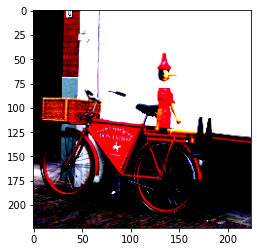

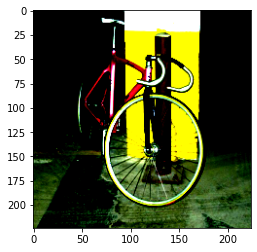

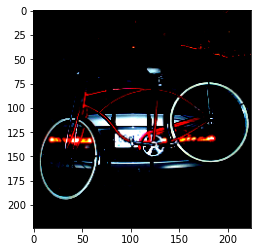

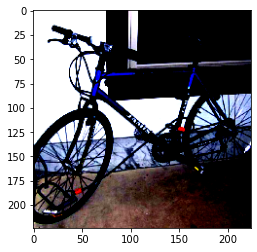

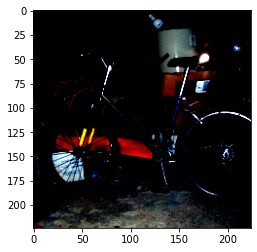

In [16]:
for indices in im1_n_index[0]:
    im1, label1, weught1 = test_loader.dataset.__getitem__(indices)
    plt.figure()
    plt.imshow(im1.permute(1,2,0).numpy())
    # plt.show()
    print(label1.numpy())
    print(type(label1.numpy().nonzero()[0][0]))
    label_name1 = test_loader.dataset.get_class_name(label1.numpy().nonzero()[0][0])
    print(label_name1)

## 5.2 t-SNE visualization of intermediate features (7pts)
We can also visualize how the feature representations specialize for different classes. Take 1000 random images from the test set of PASCAL, and extract caffenet (scratch) fc7 features from those images. Compute a 2D [t-SNE](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html) projection of the features, and plot them with each feature color coded by the GT class of the corresponding image. If multiple objects are active in that image, compute the color as the ”mean” color of the different classes active in that image. Legend the graph with the colors for each object class.

In [2]:
class CaffeNetFC7(nn.Module):
    def __init__(self, num_classes=20, inp_size=224, c_dim=3):
        super().__init__()
        self.num_classes = num_classes
        self.conv1 = nn.Conv2d(in_channels=c_dim, out_channels=96, kernel_size=11, stride=4, padding='valid')
        self.conv2 = nn.Conv2d(in_channels=96, out_channels=256, kernel_size=5, stride=1, padding='same')
        self.conv3 = nn.Conv2d(in_channels=256, out_channels=384, kernel_size=3, stride=1, padding='same')
        self.conv4 = nn.Conv2d(in_channels=384, out_channels=384, kernel_size=3, stride=1, padding='same')
        self.conv5 = nn.Conv2d(in_channels=384, out_channels=256, kernel_size=3, stride=1, padding='same')
        self.nonlinear = nn.ReLU()
        self.pool1 = nn.MaxPool2d(kernel_size=3, stride=2)
        self.pool2 = nn.MaxPool2d(kernel_size=3, stride=2)
        self.pool5 = nn.MaxPool2d(kernel_size=3, stride=2)

        self.flat_dim = 256 * 5 * 5
        self.fc6 = nn.Sequential(nn.Linear(self.flat_dim, 4096), nn.ReLU(), nn.Dropout(0.5))
        self.fc7 = nn.Sequential(nn.Linear(4096, 4096), nn.ReLU(), nn.Dropout(0.5))
        self.fc8 = nn.Sequential(nn.Linear(4096, num_classes))
    
    def forward(self, x):
        N = x.size(0)
        x = self.conv1(x)
        x = self.nonlinear(x)
        x = self.pool1(x)

        x = self.conv2(x)
        x = self.nonlinear(x)
        x = self.pool2(x)

        x = self.conv3(x)
        x = self.nonlinear(x)
        x = self.conv4(x)
        x = self.nonlinear(x)

        x = self.conv5(x)
        x = self.nonlinear(x)
        x = self.pool5(x)

        flat_x = x.view(N, self.flat_dim)
        out = self.fc6(flat_x)
        out = self.fc7(out)
        # out = self.fc8(out)

        return out

In [10]:
# caffenet fc7
import utils
from utils import ARGS
import numpy as np
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
caffe_fc7 = CaffeNetFC7().to(device)
model_name='caffenet2'
epoch=50
path = 'model_params/checkpoint-{}-epoch{}.pth'.format(
        model_name, epoch)
caffe_fc7.load_state_dict(torch.load(path, map_location=device))
caffe_fc7.eval()
# dicts = model.state_dict()
# pool5 = model.get_pool5()
# print(pool5.numpy())
# for key,value in dicts.items():
#   print(key)
args = ARGS(epochs=10, lr=0.0001, batch_size=32, test_batch_size=128, gamma=0.75, step_size=5, save_at_end=True, save_freq=-1, use_cuda=True)
args.test_batch_size=250
test_loader = utils.get_data_loader(
        'voc', train=False, batch_size=args.test_batch_size, split='test', inp_size=args.inp_size)
features = None
labels = None
i=0
with torch.no_grad():
    for batch_idx, (data, target, wgt) in enumerate(test_loader):
        i = i+1
        # TODO Q1.3: insert your code here
        # print(batch_idx, data.shape)

        data, target, wgt = data.to(device), target.to(device), wgt.to(device)
        output = caffe_fc7(data)
        if features is None:
            features = output.cpu().detach().numpy()
            labels = target.cpu().detach().numpy()
        else:
            features = np.concatenate((features, output.cpu().detach().numpy()), axis=0)
            labels = np.concatenate((labels, target.cpu().detach().numpy()), axis=0)

        if i>=4:
                break
        # output_total = np.append(output_total, output.cpu().detach().numpy())
        # print(output.shape, output_total.shape)


print(batch_idx)
print(features.shape)

3
(1000, 4096)


In [11]:
# plot t-SNE here
from sklearn.manifold import TSNE
n_components = 2
tsne = TSNE(n_components)
tsne_result = tsne.fit_transform(features)
tsne_result.shape

/home/unanditha02/anaconda3/envs/dl-env/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/unanditha02/anaconda3/envs/dl-env/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


(1000, 2)

In [80]:
# print(labels.shape)
# print(labels[0])
# print(type(labels[0].nonzero()[0]))
# y = np.zeros(len(labels))
y = []
for i in range(len(labels)):
    mean_label = 0
    num_labels = len(labels[i].nonzero()[0])
    for label in labels[i].nonzero()[0]:
        # print(label)
        mean_label = (mean_label + label)
    mean_label = mean_label/num_labels
    label1= test_loader.dataset.get_class_name(int(mean_label))
    # y[i] = label1
    y.append(label1)

# print("mean: ",y)


<AxesSubplot:xlabel='tsne-2d-one', ylabel='tsne-2d-two'>

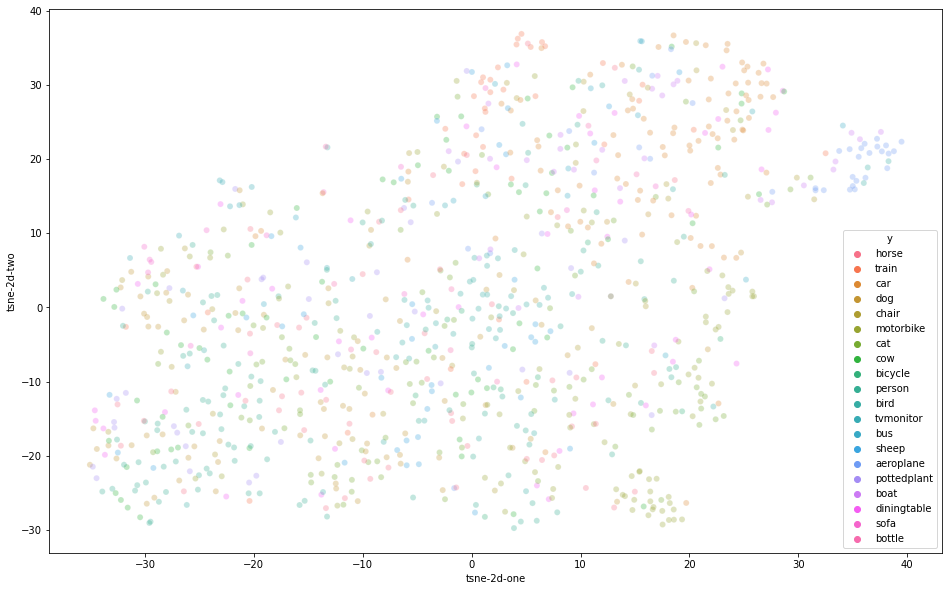

In [79]:
import seaborn as sns
import pandas as pd
df = pd.DataFrame()
# print(labels.shape)
df['tsne-2d-one'] = tsne_result[:,0]
df['tsne-2d-two'] = tsne_result[:,1]
df['y'] = y
# print(tsne_result[:,0].shape, tsne_result[:,1].shape, y.shape)
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="y",
    # palette=sns.color_palette("icefire", as_cmap=True),
    data=df,
    legend="full",
    alpha=0.3
)

## 5.3 Are some classes harder? (6pts)
Show the per-class performance of your caffenet (scratch) and ResNet (finetuned) models. This is an open-ended question and you may use any performance metric that makes sense. Try to explain, by observing examples from the dataset, why some classes are harder or easier than the others (consider the easiest and hardest class). Do some classes see large gains due to pre-training? Can you explain why that might happen?

**YOUR ANSWER HERE**

In [2]:
#  caffenet
import utils
from utils import ARGS
import numpy as np
from models_eval import CaffeNet53

args = ARGS(epochs=10, lr=0.0001, batch_size=32, test_batch_size=128, gamma=0.75, step_size=5, save_freq=-1, use_cuda=True)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
caffe_53 = CaffeNet53().to(device)
test_loader = utils.get_data_loader(
        'voc', train=False, batch_size=args.test_batch_size, split='test', inp_size=args.inp_size)
model_name='caffenet2'
epoch=50
path = 'model_params/checkpoint-{}-epoch{}.pth'.format(
        model_name, epoch)
caffe_53.load_state_dict(torch.load(path, map_location=device))

caffe_53.eval()
ap, map = utils.eval_dataset_map(caffe_53, args.device, test_loader)

# print(ap.shape)
# print(features.shape)



AttributeError: 'list' object has no attribute 'shape'

20


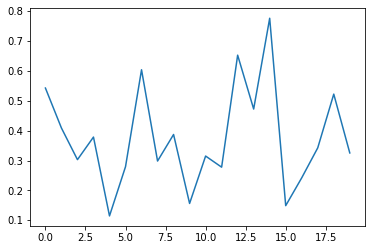

In [7]:
print(len(ap))
n = np.arange(0, 20)
# plt.plot(VOCDataset.CLASS_NAMES, ap)
plt.plot(n, ap)

In [11]:
#  resnet
import utils
from utils import ARGS
import numpy as np
from models_eval import CaffeNet53

args = ARGS(epochs=10, lr=0.0001, batch_size=32, test_batch_size=128, gamma=0.75, step_size=5, save_freq=-1, use_cuda=True)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
resnet = models.resnet18(pretrained=True).to(device)
resnet.eval()
ap, map = utils.eval_dataset_map(resnet, args.device, test_loader)


Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7fae24c1b550>
Traceback (most recent call last):
  File "/home/unanditha02/anaconda3/envs/dl-env/lib/python3.8/site-packages/torch/utils/data/dataloader.py", line 1328, in __del__
    self._shutdown_workers()
  File "/home/unanditha02/anaconda3/envs/dl-env/lib/python3.8/site-packages/torch/utils/data/dataloader.py", line 1320, in _shutdown_workers
    if w.is_alive():
  File "/home/unanditha02/anaconda3/envs/dl-env/lib/python3.8/multiprocessing/process.py", line 160, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7fae24c1b550>
Traceback (most recent call last):
  File "/home/unanditha02/anaconda3/envs/dl-env/lib/python3.8/site-packages/torch/utils/data/dataloader.py", line 1328, in __del__
    self._shutdown_workers()
  File "/home/unanditha02/anacond

20


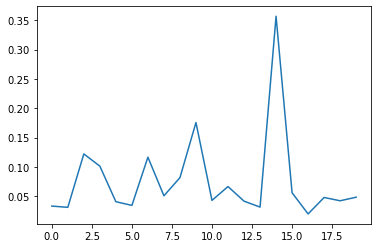

In [12]:
print(len(ap))
n = np.arange(0, 20)
# plt.plot(VOCDataset.CLASS_NAMES, ap)
plt.plot(n, ap)